# Piecewise Linear Regression

![piecewiseLinearRegression](./figs/regression1.png)


## Motivation

 Relationships that can be explained by linear regression are limited in practice. Polynomial or other complex machine learning models are hard to explain, and could behave extreme outside of the data range. Piecewise linear regression, with flexible number of segments and break points may work when linear regression is too simple but patches of linear regression could express the phases of the relationship.

Some examples of piecewise linear regression applications are linked below:

- [A Tutorial on the Piecewise Regression Approach Applied to Bedload Transport Data](https://www.fs.fed.us/rm/pubs/rmrs_gtr189.pdf)
- [Water-cement ration v.s. compressive strength](https://onlinecourses.science.psu.edu/stat501/node/310/)
- [Piecewise Linear Regression: A Statistical Method for the Analysis of the Relationship between Traffic Signal Parameters and Air Pollutant Emissions](http://atrf.info/papers/2016/files/ATRF2016_Full_papers_resubmission_64.pdf)

## Previous works

[1] [A Tutorial on the Piecewise Regression Approach Applied to Bedload Transport Data](https://www.fs.fed.us/rm/pubs/rmrs_gtr189.pdf)
- Break point estimates need to be provided by user
- Use of SAS NLIN, Nonlinear least squares regression

[2] [segmented: An R Package to Fit Regression Models with Broken-Line Relationships](https://www.researchgate.net/publication/234092680_Segmented_An_R_Package_to_Fit_Regression_Models_With_Broken-Line_Relationships)

- Break point estimates need to be provided by user
- Iterative linear regression

[3] [A Learning Algorithm for Piecewise Linear Regression](https://pdfs.semanticscholar.org/7345/d357145bc19701397cb894d22e28f770513e.pdf)

- Clustering and regression. Multi-variables. The line may be disconnected.
- Separate gate for each hidden node.


##  Proposed method - Neural network application

### Developping an intuition

Can you imagine adding up following functions ($h_1+h_2+h_3$)?

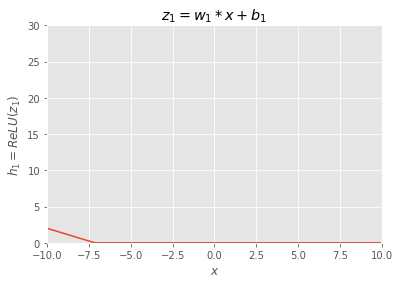

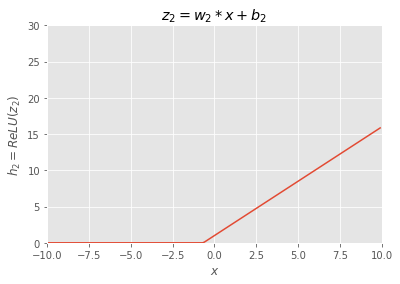

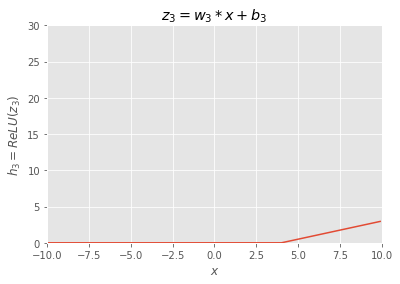

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def ReLU(x):
    y = np.maximum(0, x)
    return y

def plothi(w,b,i):
    x = np.arange(-10, 10, 0.1)
    z = w*x+b
    h = ReLU(z)
    plt.plot(x,h)
    plt.xlim(-10, 10)
    plt.ylim(0, 30)
    plt.xlabel('$x$')
    plt.ylabel('$h_{}=ReLU(z_{})$'.format(i,i))
    plt.title('$z_{}=w_{}*x+b_{}$'.format(i,i,i))
    plt.grid(True)
    plt.show()

# hidden note 1 output
i = 1 
b = -5
w = -0.7
plothi(w,b,i)

# hidden note 2 output
i = 2
b = 1
w = 1.5
plothi(w,b,i)

# hidden note 3 output
i = 3
b = -2
w = 0.5
plothi(w,b,i)

Answer:

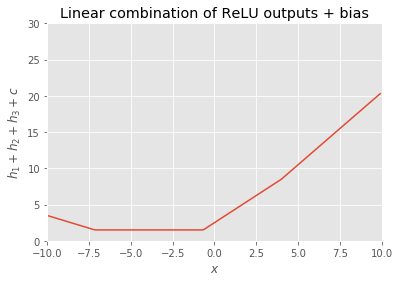

In [2]:
x = np.arange(-10, 10, 0.1)

b = -5
w = -0.7
h1 = ReLU(w*x+b)

b = 1
w = 1.5
h2 = ReLU(w*x+b)

b = -2
w = 0.5
h3 = ReLU(w*x+b)

c = 1.5


plt.plot(x,h1+h2+h3+c)
plt.xlim(-10, 10)
plt.ylim(0, 30)
plt.xlabel('$x$')
plt.ylabel('$h_1+h_2+h_3+c$')
plt.title('Linear combination of ReLU outputs + bias')
plt.grid(True)
plt.show()


### Conclusion

Linear combination of ReLU outputs + bias becomes connected lines.
In multi-dimention $x=(x_1,x_2,..)$, it becomes connected hyperplane.


### Graphical explanation

![feedforward](./figs/feedforward.png)

 Let me use the diagram above to explain the idea. This is 2 variables ($x_1$, $x_2$) example, but you can increase number of variables. 
 The first layer represents independent variables, or input layers. The bottom node is constant 1 and is expressing bias with edges to the hidden layers.
 
 The 2nd layer is hidden layer, and in this case we have 3 nodes $h_1$, $h_2$, and $h_3$. This is equal to the number of potential segments-1. In this case above, we designed to create 4 segments at most. Input to the $h_1$ is $w_{11}*x_1+w_{21}*x_2+b_1$. Output of hidden node is the result of ReLU activation. The output layer node $y$ is just some of hidden layer outputs plus bias $c$.
 
  The error between $y$ and actual observation $\bar{y}$ will create a loss function and we optimize $W$ , $b$ and $c$ to reduce the loss. We also apply L1 regularization on weights to regulate the number of segments. L1 regularization tends to force weights to 0 if the corresponding variable does not have much impact.
  
 The benefit of this neural network optimization method is that we can avoid the manual input like initial breakpoints estimate or number of segment, and let the data decide. In comparison with [3], it is quite similar idea, but this model is much simple. The gate mentioned in the [3] corresponds to ReLU with no separate parameters here, and there's no clustering etc. It's just summing up output of ReLU.

### Methematical explanation

 For those prefer mathematical explanation, here's the formula:

$$
y = (1,...,1) (W^Tx+b)^+ +c
$$

Here, $y$ is a dependent variable. $x$ is independent variables. It is a column vector with different variables in row direction. $W$ contains slopes of different input variables in the row direction and the hidden nodes in the column direction. The result of $W^Tx$ places hidden nodes in row direction. The bias $b$ is a column vector with a bias for each hidden nodes in row direction. Let me provide more concrete example. The $i$th row of $W^Tx+b$ is an input to a hidden node $h_i$, say $z_i$. The $z_i$ for 2 variables input $x = [x_1, x_2]^T$ can be written as 
$$
z_i = \begin{bmatrix}
w_{1i}\\ 
w_{2i}
\end{bmatrix}^T  \begin{bmatrix}
x_1\\ 
x_2
\end{bmatrix} + b_i = w_{1i}*x_1+w_{2i}*x_2+b_i
$$
Here, $w_{1i}$ and $w_{2i}$ are slopes for $x_1$ and $x_2$ in segment $i$ respectively. $b_i$ is a bias. 

The $(.)^+$ represent ReLU  or $max\{0, . \} $.  Finally, applying (1,...,1) just means adding up all the rows, in other words, the outputs of all the hidden nodes plus bias $c$.

By adding 1 on the last row on $x$,  and adding $b$ on the last row on $W$, the formula can be written as
$$
y = (1,...,1) (W^Tx)^+ +c
$$




## Getting data

If you clone the git repository, you will get the data. 
If you want to download by yourself, follow the instruction below.

Get sample data from [here](https://www.fs.usda.gov/rds/archive/Product/RDS-2007-0004). Download the zip file, and extract on the working directory. You should have ./RDS-2007-0004.


## Import sample data

In [3]:
"""
import sample data
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data = pd.read_csv("RDS-2007-0004\Data\HAYDEN_bedloadtransport.csv",skiprows=7)
data = pd.read_csv("RDS-2007-0004\Data\LTLGRAN_bedloadtransport.csv",skiprows=7)
data.head()

,Date,Year,X,Y
0,05/08/85,1985,3.936450,0.049770
1,05/15/85,1985,2.945258,0.009324
2,05/25/85,1985,3.653253,0.016485
3,05/30/85,1985,2.831979,0.013104
4,06/05/85,1985,1.925746,0.003601


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
Date    123 non-null object
Year    123 non-null int64
X       123 non-null float64
Y       123 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


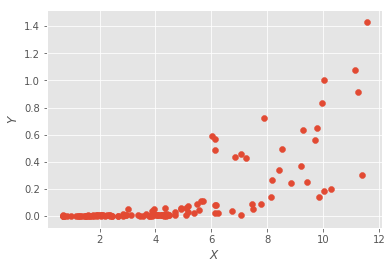

In [5]:
plt.scatter(data['X'],data['Y'])
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

### Model implementation with TF

For this specific method, it is not quite computationaly heavy. You may be able to use and CPU and any library if it works.

Tensorflow is the most popular library when it comes to nueral network and it scales well on GPUs.
It also allow you to do the stuff you want with flexibility. When your logic is not standard vanila methods, things begome difficult with higher level library like Keras. 

So why not Tensorflow. It works.
By the way, you can use Tensorflow with R.

First, check your device.

In [6]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices() 

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13170657934810058474, name: "/gpu:0"
 device_type: "GPU"
 memory_limit: 6753009500
 locality {
   bus_id: 1
 }
 incarnation: 16298767861173171011
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0"]

The key of TF implementation is to understand computation graph, session , operation and palceholder.

------------------Epoch 0/500 ------------------
loss = 0.028167175129055977
------------------Epoch 1/500 ------------------
loss = 0.02807006612420082
------------------Epoch 2/500 ------------------
loss = 0.027874231338500977
------------------Epoch 3/500 ------------------
loss = 0.027788657695055008
------------------Epoch 4/500 ------------------
loss = 0.027671020478010178
------------------Epoch 5/500 ------------------
loss = 0.027519864961504936
------------------Epoch 6/500 ------------------
loss = 0.027397358790040016
------------------Epoch 7/500 ------------------
loss = 0.027300363406538963
------------------Epoch 8/500 ------------------
loss = 0.027188267558813095
------------------Epoch 9/500 ------------------
loss = 0.027067668735980988
------------------Epoch 10/500 ------------------
loss = 0.026965321972966194
------------------Epoch 11/500 ------------------
loss = 0.026877187192440033
------------------Epoch 12/500 ------------------
loss = 0.0267824158072471

loss = 0.02384435385465622
------------------Epoch 106/500 ------------------
loss = 0.023836081847548485
------------------Epoch 107/500 ------------------
loss = 0.023827986791729927
------------------Epoch 108/500 ------------------
loss = 0.023820051923394203
------------------Epoch 109/500 ------------------
loss = 0.02381228841841221
------------------Epoch 110/500 ------------------
loss = 0.023804688826203346
------------------Epoch 111/500 ------------------
loss = 0.02379721589386463
------------------Epoch 112/500 ------------------
loss = 0.023789890110492706
------------------Epoch 113/500 ------------------
loss = 0.023782722651958466
------------------Epoch 114/500 ------------------
loss = 0.023775719106197357
------------------Epoch 115/500 ------------------
loss = 0.023768872022628784
------------------Epoch 116/500 ------------------
loss = 0.02376222051680088
------------------Epoch 117/500 ------------------
loss = 0.023755742236971855
------------------Epoch 118/

loss = 0.02348516508936882
------------------Epoch 214/500 ------------------
loss = 0.023484302684664726
------------------Epoch 215/500 ------------------
loss = 0.023483464494347572
------------------Epoch 216/500 ------------------
loss = 0.02348264306783676
------------------Epoch 217/500 ------------------
loss = 0.023481838405132294
------------------Epoch 218/500 ------------------
loss = 0.023481054231524467
------------------Epoch 219/500 ------------------
loss = 0.023480290547013283
------------------Epoch 220/500 ------------------
loss = 0.023479541763663292
------------------Epoch 221/500 ------------------
loss = 0.023478806018829346
------------------Epoch 222/500 ------------------
loss = 0.02347809448838234
------------------Epoch 223/500 ------------------
loss = 0.023477395996451378
------------------Epoch 224/500 ------------------
loss = 0.02347671613097191
------------------Epoch 225/500 ------------------
loss = 0.023476049304008484
------------------Epoch 226/

loss = 0.02344554103910923
------------------Epoch 319/500 ------------------
loss = 0.02344547025859356
------------------Epoch 320/500 ------------------
loss = 0.02344539761543274
------------------Epoch 321/500 ------------------
loss = 0.02344532683491707
------------------Epoch 322/500 ------------------
loss = 0.023445263504981995
------------------Epoch 323/500 ------------------
loss = 0.023445190861821175
------------------Epoch 324/500 ------------------
loss = 0.02344512939453125
------------------Epoch 325/500 ------------------
loss = 0.023445066064596176
------------------Epoch 326/500 ------------------
loss = 0.023445000872015953
------------------Epoch 327/500 ------------------
loss = 0.023444943130016327
------------------Epoch 328/500 ------------------
loss = 0.02344488352537155
------------------Epoch 329/500 ------------------
loss = 0.023444823920726776
------------------Epoch 330/500 ------------------
loss = 0.0234447680413723
------------------Epoch 331/500 

loss = 0.023442456498742104
------------------Epoch 435/500 ------------------
loss = 0.023442447185516357
------------------Epoch 436/500 ------------------
loss = 0.02344244346022606
------------------Epoch 437/500 ------------------
loss = 0.02344243973493576
------------------Epoch 438/500 ------------------
loss = 0.023442432284355164
------------------Epoch 439/500 ------------------
loss = 0.023442426696419716
------------------Epoch 440/500 ------------------
loss = 0.023442422971129417
------------------Epoch 441/500 ------------------
loss = 0.02344241738319397
------------------Epoch 442/500 ------------------
loss = 0.023442409932613373
------------------Epoch 443/500 ------------------
loss = 0.023442402482032776
------------------Epoch 444/500 ------------------
loss = 0.023442400619387627
------------------Epoch 445/500 ------------------
loss = 0.02344239503145218
------------------Epoch 446/500 ------------------
loss = 0.02344238944351673
------------------Epoch 447/5

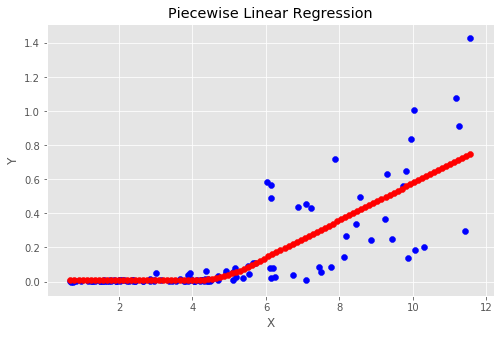

In [7]:
import tensorflow as tf
from sklearn import linear_model

"""
parameters
"""
sample_rate = 1.0 # rondom sampling rate for each batch. 
#It does not have much capacity and probably not much worry about overfitting. 1.0 should be fine.
epoc = 500
input_dim = 1 # number of input dimention(variables)
h1_dim = 3 # potential number of segments-1
lamda = 0.0001 # L1 reglurarization
lr=0.001 #learning rate

"""
fromatting numpy array
"""
X = np.array(data.X).reshape(-1,input_dim)
Y = np.array(data.Y).reshape(-1,1)


"""
Util functions
"""
# next batch from stack overflow
def next_batch(rate, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[: int(len(data)*rate)]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

"""
helping search with a good initial values
"""
lreg = linear_model.LinearRegression()
lreg.fit(X, Y)

"""
tensorflow graph
"""
# reset graph
tf.reset_default_graph()

# Placeholders for input data and the targets
x_ph  = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='Input')
y_ph = tf.placeholder(dtype=tf.float32, shape=[None,1], name='Output')

w = tf.get_variable("weight", shape=[input_dim,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.coef_[0][0]/h1_dim,stddev=0.001))
b = tf.get_variable('bias1', shape = [1,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.intercept_[0]/h1_dim, stddev=0.001))
c = tf.get_variable('bias2', shape = [1,1],
                    initializer=tf.random_normal_initializer(mean=0, stddev=0.001))

h = tf.nn.relu(tf.add(tf.matmul(x_ph, w),b))
y = tf.reduce_sum(h, axis = 1)+c

L1 = tf.reduce_sum(tf.abs(w))
loss = tf.losses.mean_squared_error(y_ph, tf.reshape(y,(-1,1)))+lamda*L1
opt = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

init = tf.global_variables_initializer()

"""
training
"""
with tf.Session() as sess:  
    sess.run(init)
    for i in range(epoc):
        print("------------------Epoch {}/{} ------------------".format(i, epoc))
        batch_x, batch_y = next_batch(sample_rate,X,Y)            
        _, loss_val = sess.run([opt,loss],feed_dict={x_ph:batch_x ,y_ph:batch_y })
        print("loss = {}".format(loss_val))
    y_hat = sess.run([y],feed_dict={x_ph:X})
    y_hat = np.asarray(y_hat).reshape(-1,1)
    X_slice = np.linspace(np.amin(X), np.amax(X), num=100).reshape(-1,1)
    Y_slice_hat = sess.run([y],feed_dict={x_ph:X_slice})
    Y_slice_hat = np.asarray(Y_slice_hat).reshape(-1,1)
    np.savetxt("yhat.csv", np.concatenate((X,Y,y_hat),axis=1),header="X, Y, Yhat", delimiter=",")

"""
graph
"""
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, Y, color='blue')
ax.scatter(X_slice, Y_slice_hat, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Piecewise Linear Regression')
plt.show()

### Saving and loading the model

We are creating a model folder for the result of the model / run (experiment) will be saved.

Typically, data for the tensorbaord can be saved under the model folder.


In [9]:
from datetime import datetime
import os

exptitle = 'MyFirstModel'
results_path = './Results'

def form_results():
    """
    Forms folders for each run to store the tensorboard files and saved models.
    """
    folder_name = "/{0}_{1}".format(datetime.now().strftime("%Y%m%d%H%M%S"),exptitle)
    tensorboard_path = results_path + folder_name + '/Tensorboard'
    saved_model_path = results_path + folder_name + '/Saved_models/'
    print(results_path + folder_name)
    if not os.path.exists(results_path + folder_name):
        os.makedirs(results_path + folder_name)
        os.makedirs(tensorboard_path)
        os.makedirs(saved_model_path)
    return tensorboard_path, saved_model_path

./Results/20181018180330_MyFirstModel/Saved_models/
INFO:tensorflow:Restoring parameters from ./Results/20181018180330_MyFirstModel/Saved_models/-499


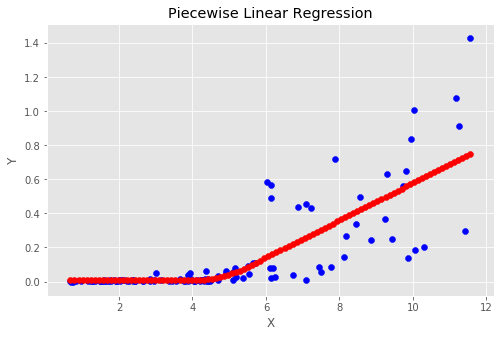

In [11]:
import tensorflow as tf
from sklearn import linear_model

mode = 0 # 1: training, 0:loading model
model_loc = '/20181018180330_MyFirstModel/Saved_models/'
"""
parameters
"""
sample_rate = 1.0 # rondom sampling rate for each batch. 
#It does not have much capacity and probably not much worry about overfitting. 1.0 should be fine.
epoc = 500
input_dim = 1 # number of input dimention(variables)
h1_dim = 3 # potential number of segments-1
lamda = 0.0001 # L1 reglurarization
lr=0.001 #learning rate

"""
tensorflow graph
"""
# reset graph
tf.reset_default_graph()

# Placeholders for input data and the targets
x_ph  = tf.placeholder(dtype=tf.float32, shape=[None, input_dim], name='Input')
y_ph = tf.placeholder(dtype=tf.float32, shape=[None,1], name='Output')

w = tf.get_variable("weight", shape=[input_dim,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.coef_[0][0]/h1_dim,stddev=0.001))
b = tf.get_variable('bias1', shape = [1,h1_dim],
                    initializer=tf.random_normal_initializer(mean=lreg.intercept_[0]/h1_dim, stddev=0.001))
c = tf.get_variable('bias2', shape = [1,1],
                    initializer=tf.random_normal_initializer(mean=0, stddev=0.001))

h = tf.nn.relu(tf.add(tf.matmul(x_ph, w),b))
y = tf.reduce_sum(h, axis = 1)+c

L1 = tf.reduce_sum(tf.abs(w))
loss = tf.losses.mean_squared_error(y_ph, tf.reshape(y,(-1,1)))+lamda*L1
opt = tf.train.AdamOptimizer(learning_rate = lr).minimize(loss)

init = tf.global_variables_initializer()

"""
Tensorboard scalar
"""
sm_L1 = tf.summary.scalar(name='L1', tensor=L1) ######
sm_loss = tf.summary.scalar(name='mse_loss', tensor=loss) ######
summary_op = tf.summary.merge_all() ######

"""
training
"""
steps = -1
saver = tf.train.Saver() ######
with tf.Session() as sess:  
    if mode == 1:
        sess.run(init)
        tensorboard_path, saved_model_path = form_results()   ######
        writer = tf.summary.FileWriter(logdir=tensorboard_path, graph=sess.graph) ######
        for i in range(epoc):
            steps += 1
            batch_x, batch_y = next_batch(sample_rate,X,Y)          
            _, v_loss = sess.run([opt,loss],feed_dict={x_ph:batch_x ,y_ph:batch_y })
            if i % 100 == 0:######
                print("------------------Epoch {}/{} ------------------".format(i, epoc))
                smv_L1,smv_loss = sess.run([sm_L1,sm_loss],feed_dict={x_ph:batch_x ,y_ph:batch_y })######
                writer.add_summary(smv_L1, global_step=steps)   ######
                writer.add_summary(smv_loss, global_step=steps) ######
                print("loss = {}".format(v_loss))

        writer.close() ######
        y_hat = sess.run([y],feed_dict={x_ph:X})
        y_hat = np.asarray(y_hat).reshape(-1,1)
        X_slice = np.linspace(np.amin(X), np.amax(X), num=100).reshape(-1,1)
        Y_slice_hat = sess.run([y],feed_dict={x_ph:X_slice})
        Y_slice_hat = np.asarray(Y_slice_hat).reshape(-1,1)
        np.savetxt("yhat.csv", np.concatenate((X,Y,y_hat),axis=1),header="X, Y, Yhat", delimiter=",")
        saver.save(sess, save_path=saved_model_path, global_step=steps,write_meta_graph = True)######
    if mode ==0: ######
        print(results_path + model_loc)
        saver.restore(sess, save_path=tf.train.latest_checkpoint(results_path + model_loc))
        X_slice = np.linspace(np.amin(X), np.amax(X), num=100).reshape(-1,1)
        Y_slice_hat = sess.run([y],feed_dict={x_ph:X_slice})
        Y_slice_hat = np.asarray(Y_slice_hat).reshape(-1,1)
        """
        graph
        """
        fig, ax = plt.subplots(figsize=(8,5))
        ax.scatter(X, Y, color='blue')
        ax.scatter(X_slice, Y_slice_hat, color='red')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.title('Piecewise Linear Regression')
        plt.show()

### fire up the Tensorboard

tensorboard --logdir=./Results

